In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## BOM Data Frame

In [19]:
df_movie_gross = pd.read_csv('data/bom.movie_gross.csv.gz')

## IMDB Data Frames

In [72]:
df_name_basics = pd.read_csv('data/imdb.name.basics.csv.gz')
df_title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')
df_title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_title_crew = pd.read_csv('data/imdb.title.crew.csv.gz')
df_title_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
df_title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [21]:
#df_title_principals.head(50)
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## Remaining Data Frames

In [22]:
df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')
df_reviews = pd.read_csv('data/rt.reviews.tsv.gz',sep='\t',encoding='latin-1')
#df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz')
df_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [110]:
#df_name_basics
#df_title_crew['writers'] = df_title_crew['writers'].str.split(',')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"Action and Adventure,Classics,Drama",William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"Drama,Science Fiction and Fantasy",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"Drama,Musical and Performing Arts",Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"Drama,Mystery and Suspense",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,"Drama,Romance",Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,"Action and Adventure,Horror,Mystery and Suspense",NaN,NaN,2006-08-18,"Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,"Comedy,Science Fiction and Fantasy",Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,"Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,"Classics,Comedy,Drama,Musical and Performing Arts",Gordon Douglas,NaN,1962-01-01,"May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,"Comedy,Drama,Kids and Family,Sports and Fitness",David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,"Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [24]:
#Convert Movie Budgets Numeric Columns from objects to Floats

df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)

## Begin Merge on Movie Budgets and Movie Info

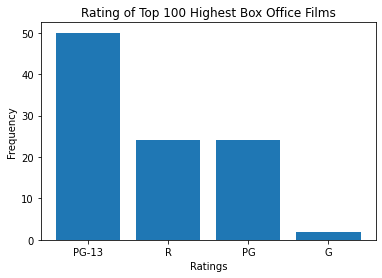

In [194]:
df_movie_info['release_date'] = pd.to_datetime(df_movie_info['theater_date'])
df_dropped_na = df_movie_info.dropna(subset=['box_office'])

#df_movie_budgets['total_profit'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']
#df_movie_budgets['release_date'] = pd.to_datetime(df_movie_budgets['release_date'])
#df_info_budget_merge = df_movie_budgets.merge(df_movie_info, on='release_date' )
#df_info_budget_merge.sort_values('total_profit', ascending=False).head(50)
#df_movie_info['box_office'] = df_movie_info['box_office'].str.replace(',','').astype(float)
df_dropped_na =df_dropped_na.sort_values('box_office',ascending=False).head(100)

fig , ax = plt.subplots()

ax.bar(x=df_dropped_na.value_counts('rating').index[:100],height =df_dropped_na.value_counts('rating').head(100))
ax.set_title('Rating of Top 100 Highest Box Office Films')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency');

rating_map = {'R':4, 'PG-13':3, 'PG':2, 'G':1,}
df_dropped_na['rating_number'] = df_dropped_na['rating'].map(rating_map)




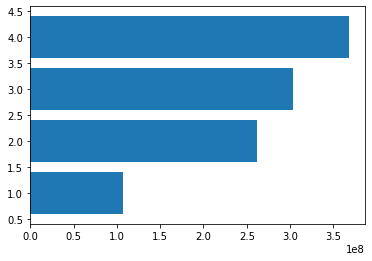

In [205]:
fig, ax =plt.subplots()

ax.barh(y=df_dropped_na['rating_number'].head(100),width=df_dropped_na['box_office'].head(100));
ax.boxplot()

In [104]:
df_movie_info['theater_date'] = pd.to_datetime(df_movie_info['theater_date'])
df_movie_info['genre'] = df_movie_info['genre'].str.replace('|',',')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
4681,100,Four old college friends in their forties come...,NR,"Comedy,Drama",Willem van de Sande Bakhuyzen,NaN,NaT,NaN,NaN,NaN,108 minutes,NaN,"Aug 30, 1972",The Last House on the Left,87000.0,3100000.0,3.100000e+06,3.013000e+06
4638,100,Four old college friends in their forties come...,NR,"Comedy,Drama",Willem van de Sande Bakhuyzen,NaN,NaT,NaN,NaN,NaN,108 minutes,NaN,"Oct 14, 2016",The Accountant,40000000.0,86260045.0,1.529621e+08,1.129621e+08
4651,100,Four old college friends in their forties come...,NR,"Comedy,Drama",Willem van de Sande Bakhuyzen,NaN,NaT,NaN,NaN,NaN,108 minutes,NaN,"Sep 11, 1994",Rapa Nui,20000000.0,305070.0,3.050700e+05,-1.969493e+07
4650,100,Four old college friends in their forties come...,NR,"Comedy,Drama",Willem van de Sande Bakhuyzen,NaN,NaT,NaN,NaN,NaN,108 minutes,NaN,"Apr 12, 1985",Ladyhawke,20000000.0,18400000.0,1.840000e+07,-1.600000e+06
4649,100,Four old college friends in their forties come...,NR,"Comedy,Drama",Willem van de Sande Bakhuyzen,NaN,NaT,NaN,NaN,NaN,108 minutes,NaN,"Jan 18, 2019",Glass,20000000.0,111035005.0,2.453035e+08,2.253035e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1,"This gritty, fast-paced, and innovative police...",R,"Action and Adventure,Classics,Drama",William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN,"Feb 1, 2002",Slackers,11000000.0,4814244.0,5.942218e+06,-5.057782e+06
34,1,"This gritty, fast-paced, and innovative police...",R,"Action and Adventure,Classics,Drama",William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN,"Mar 20, 1981",The Postman Always Rings Twice,12000000.0,12200000.0,4.420000e+07,3.220000e+07
33,1,"This gritty, fast-paced, and innovative police...",R,"Action and Adventure,Classics,Drama",William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN,"Feb 26, 2010",Un ProphÃ¨te,13000000.0,2087720.0,1.991062e+07,6.910624e+06
32,1,"This gritty, fast-paced, and innovative police...",R,"Action and Adventure,Classics,Drama",William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN,"Aug 21, 1998",Dead Man on Campus,14000000.0,15064948.0,1.506495e+07,1.064948e+06


In [27]:
df_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [28]:

df_name_basics['death_year'] = df_name_basics['death_year'].isna() #Find people who are still alive
df_name_basics['titles'] = df_name_basics['known_for_titles'].apply(str).map(lambda x: len(x.split(','))) #Counting how many titles worker been in
df_name_basics.sort_values('titles', ascending=False).head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,titles
134723,nm1202937,Lisa Holmqvist,NaN,True,"costume_department,costume_designer,composer","tt1376710,tt1790954,tt3749338,tt2172095,tt1588...",6
312090,nm4291122,Ana Dumitrescu,NaN,True,"director,cinematographer,writer","tt1280016,tt3876730,tt2329998,tt6721826,tt3876...",6
24719,nm0509978,Drew Lightfoot,NaN,True,"director,animation_department,writer","tt1142977,tt6818966,tt3326126,tt0121164,tt4267512",5
507107,nm7172326,Joe Nicolosi,NaN,True,"actor,transportation_department","tt5338504,tt4497152,tt3774114,tt3476086,tt4949676",5
177641,nm1463681,Marcia Griffiths,1949.0,True,"actress,soundtrack","tt0993744,tt2214891,tt0383607,tt1428634,tt8184794",5


In [29]:
df_title_basics.loc[df_title_basics['primary_title'] =='Avatar']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror


In [30]:
#df_title_ratings

## Merge Title Basics and Title Ratings

In [31]:
df_title_basics_df_title_ratings_merge = df_title_basics.merge(df_title_ratings, on='tconst', how = 'left')#Merge Title Basics and Title Ratings on tconst
df_title_basics_df_title_ratings_merge['title'] = df_title_basics_df_title_ratings_merge['primary_title'] #Change primary_title to title for merge
df_title_basics_df_title_ratings_merge.drop('primary_title',inplace=True,axis=1) # Get rid of primary title
#Filter out Documentaries and Number of votes over 500
df_sorted = df_title_basics_df_title_ratings_merge[(df_title_basics_df_title_ratings_merge['genres'] != 'Documentary') & (df_title_basics_df_title_ratings_merge['numvotes'] > 500)]  

df_sorted.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,The Other Side of the Wind
15,tt0176694,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584.0,The Tragedy of Man
20,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,Foodfight!
32,tt0293069,Dark Blood,2012,86.0,Thriller,6.6,1053.0,Dark Blood
38,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir


In [76]:
df_sort_merge = df_sorted.merge(df_movie_gross, on='title', how ='left') #Merging Movie Gross with Title Basics and Title Ratings
df_sort_merge.drop(index=[812, 2150],inplace=True) #Dropping movies with wrong information(Frozen and Inside Out)
df_sort_merge = df_sort_merge.sort_values('domestic_gross', ascending=False).drop_duplicates(['original_title','title']) #Drop duplicate titles                                                         #Could not get duplicates to drop in one line
df_sort_merge['total_gross'] = df_sort_merge['domestic_gross'] + df_sort_merge['foreign_gross'].str.replace(',','').astype(float) 
df_sort_merge.sort_values('total_gross',ascending=False).head(50)

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
5755,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0,1.405400e+09
3289,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,Black Panther,BV,700100000.0,646900000,2018.0,1.347000e+09
6130,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903.0,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017.0,1.332600e+09
10253,tt4881806,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125.0,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018.0,1.309500e+09
5261,tt2294629,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,516998.0,Frozen,BV,400700000.0,875700000,2013.0,1.276400e+09
8303,tt3606756,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510.0,Incredibles 2,BV,608600000.0,634200000,2018.0,1.242800e+09
732,tt1300854,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",7.2,692794.0,Iron Man 3,BV,409000000.0,805800000,2013.0,1.214800e+09
5256,tt2293640,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917.0,Minions,Uni.,336000000.0,823400000,2015.0,1.159400e+09
8070,tt3498820,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",7.8,583507.0,Captain America: Civil War,BV,408100000.0,745200000,2016.0,1.153300e+09
1329,tt1477834,Aquaman,2018,143.0,"Action,Adventure,Fantasy",7.1,263328.0,Aquaman,WB,335100000.0,812700000,2018.0,1.147800e+09


0.21291108299817874

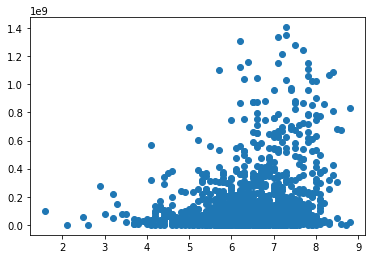

In [33]:
fig , ax = plt.subplots()

ax.scatter(x=df_sort_merge['averagerating'],y=df_sort_merge['total_gross']);
df_sort_merge.corr()['averagerating']['total_gross']